<a href="https://colab.research.google.com/github/ravindrayanamaddi/0IB-SIP_Data-Analytics/blob/main/Autocomplete_and_autocorrect_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.shape

(67434, 31)

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,67434.000000,...,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000,67433.000000
mean,33976.974835,-0.241622,-0.018321,0.683462,0.169473,-0.268578,0.101759,-0.114429,0.057624,0.030096,...,-0.028557,-0.106489,-0.038823,0.005627,0.136606,0.020725,0.002811,0.003520,96.628136,0.002506
std,14222.001116,1.857614,1.649726,1.418358,1.377279,1.385175,1.305232,1.251274,1.230082,1.167011,...,0.738014,0.639314,0.608941,0.596550,0.439152,0.497668,0.382484,0.322323,269.895189,0.049999
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,28238.000000,-1.001783,-0.590074,0.195636,-0.724684,-0.887468,-0.636482,-0.604414,-0.141812,-0.666519,...,-0.226694,-0.526921,-0.179448,-0.325986,-0.127251,-0.329217,-0.062635,-0.005865,7.680000,0.000000
50%,37354.000000,-0.241551,0.072585,0.772156,0.188286,-0.301379,-0.149794,-0.074146,0.066101,-0.063081,...,-0.061471,-0.081004,-0.051721,0.061460,0.174488,-0.075903,0.009512,0.022750,26.310000,0.000000
75%,44551.000000,1.153782,0.728136,1.405294,1.053095,0.269637,0.494996,0.420850,0.343556,0.688096,...,0.115486,0.309548,0.078955,0.403106,0.422752,0.297957,0.082538,0.075882,88.500000,0.000000
max,52534.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67434 entries, 0 to 67433
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    67434 non-null  int64  
 1   V1      67434 non-null  float64
 2   V2      67434 non-null  float64
 3   V3      67434 non-null  float64
 4   V4      67434 non-null  float64
 5   V5      67434 non-null  float64
 6   V6      67434 non-null  float64
 7   V7      67434 non-null  float64
 8   V8      67434 non-null  float64
 9   V9      67434 non-null  float64
 10  V10     67434 non-null  float64
 11  V11     67434 non-null  float64
 12  V12     67434 non-null  float64
 13  V13     67434 non-null  float64
 14  V14     67434 non-null  float64
 15  V15     67434 non-null  float64
 16  V16     67434 non-null  float64
 17  V17     67434 non-null  float64
 18  V18     67434 non-null  float64
 19  V19     67434 non-null  float64
 20  V20     67434 non-null  float64
 21  V21     67433 non-null  float64
 22

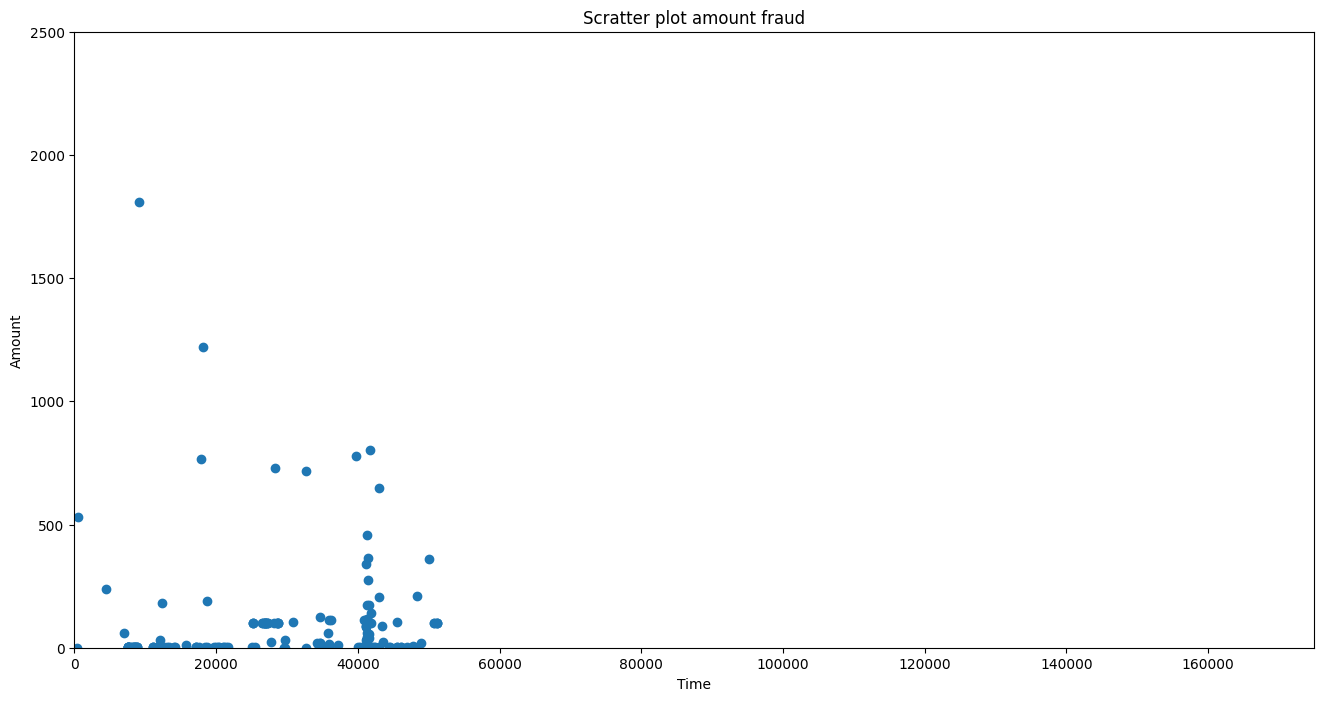

In [ ]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(16,8))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 169 frauds in the original dataset, even though there are 67264 no frauds in the dataset.


In [ ]:
df_corr = df.corr()

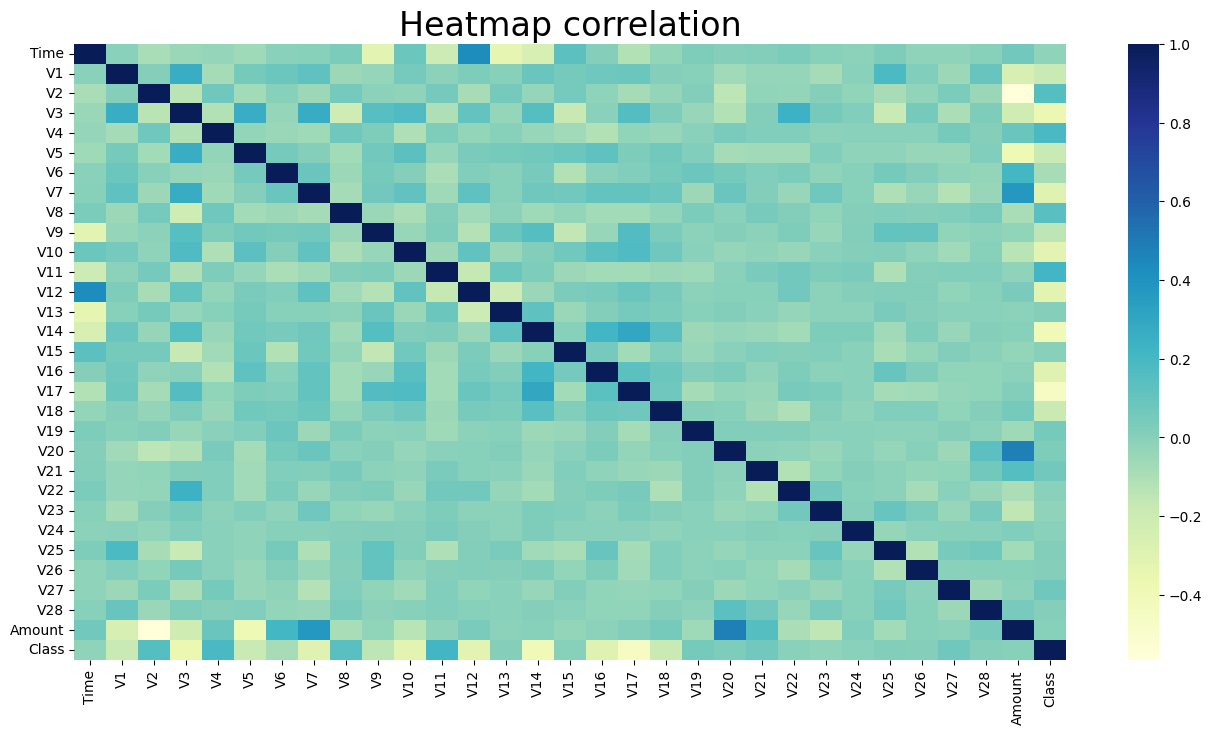

In [ ]:
import seaborn
plt.figure(figsize=(16,8))
seaborn.heatmap(df_corr, cmap="YlGnBu")
seaborn.set(font_scale=2,style='white')
plt.title('Heatmap correlation')
plt.show()

In [ ]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [ ]:
pd.concat([Normal.Amount.describe(), Normal.Time.describe()],axis=1)

,Amount,Time
count,67264.000000,67264.000000
mean,96.632489,33987.964275
std,270.008302,14220.907352
min,0.000000,0.000000
25%,7.680000,28269.750000
50%,26.380000,37363.500000
75%,88.360000,44560.250000
max,19656.530000,52532.000000


In [ ]:
pd.concat([Fraud.Amount.describe(), Fraud.Time.describe()],axis=1)

,Amount,Time
count,169.000000,169.000000
mean,94.895680,29493.242604
std,220.959331,13957.334380
min,0.000000,406.000000
25%,1.000000,17520.000000
50%,7.610000,29785.000000
75%,99.990000,41305.000000
max,1809.680000,51155.000000


In [ ]:
print('Fraud Shape:\t', Fraud.shape)
print('Normal Shape:\t', Normal.shape)

Fraud Shape:	 (169, 31)
Normal Shape:	 (67264, 31)


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['amount_scale'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scale'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
amount_scale = df['amount_scale']
time_scale = df['time_scale']
df.drop(['amount_scale', 'time_scale'], axis=1, inplace=True)
df.insert(0, 'amount_scale', amount_scale)
df.insert(1, 'time_scale', time_scale)
df.head()

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.525736,-2.289830,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-0.292254,-2.289830,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,4.359688,-2.289769,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,1.202549,-2.289769,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,0.540460,-2.289708,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [ ]:
df = df.sample(frac=1)
fraud = df.loc[df['Class'] == 1]
normal = df.loc[df['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraud, normal])
sample_data = normal_distributed_data.sample(frac=1, random_state=42)
sample_data.head(2)

,amount_scale,time_scale,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
61423,-0.165306,0.764728,1.191553,0.013882,0.564960,0.643814,-0.379347,-0.115696,-0.178354,0.039814,...,-0.048221,-0.258903,-0.600397,0.011551,0.042278,0.367775,0.181068,-0.017195,0.005898,0.0
55075,-0.264291,0.577024,1.377913,-0.630393,0.281578,-0.741375,-1.038380,-0.521309,-0.706377,0.006848,...,-0.531095,-0.235303,-0.244230,-0.051216,0.032978,0.284231,1.166949,-0.064813,-0.009605,0.0


In [ ]:
sample_data.shape

(661, 31)

In [ ]:
X = sample_data.drop('Class', axis=1)
y = sample_data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()

In [ ]:
svm_params = {"C": np.arange(1,10), "kernel":["linear", "rbf"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=7, n_jobs=-1, verbose=7).fit(X_train, y_train)

Fitting 7 folds for each of 18 candidates, totalling 126 fits


In [ ]:
svm_cv_model.best_score_

0.9783549783549784

In [ ]:
best_params = svm_cv_model.best_params_
print(best_params)

{'C': 1, 'kernel': 'linear'}


In [ ]:
svm = SVC(C = best_params['C'], kernel=best_params['kernel'], probability=True).fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_svm)

0.949748743718593

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_train, y_train, cv=21).mean()

0.976190476190476

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       144
         1.0       1.00      0.82      0.90        55

    accuracy                           0.95       199
   macro avg       0.97      0.91      0.93       199
weighted avg       0.95      0.95      0.95       199



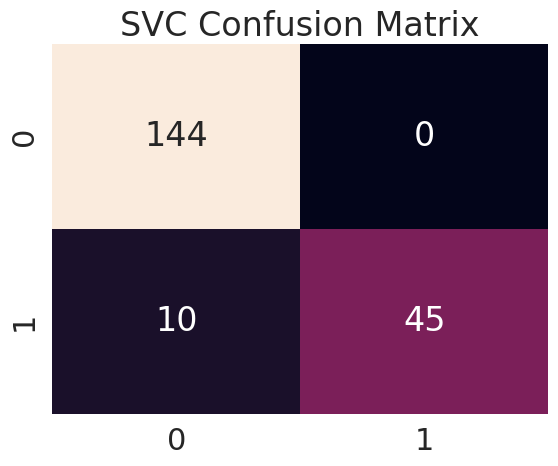

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVC Confusion Matrix')
plt.savefig('svc_con_mat')
plt.show()
